No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


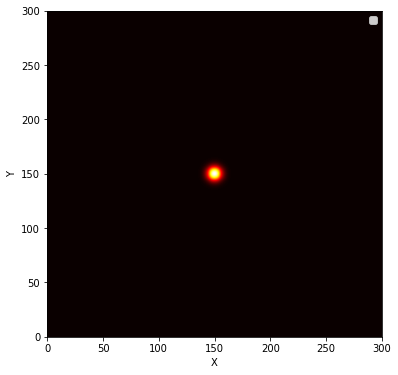

<AxesSubplot:xlabel='X', ylabel='Y'>

In [2]:
import sys
import os
# Make sure the src folder is importable
sys.path.append(os.path.join(os.getcwd(), 'src'))
%matplotlib inline
import numpy as np
from targets import Gaussian
from env import Environment

# Create a simple 2D Gaussian centered in the middle of a 300x300 grid
width = 300
height = 300
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 20.0  # somewhat spread out
target = Gaussian(mean, cov)
env = Environment(width, height, target)
env.visualize()